In [16]:
# WEB SCRAPING

import requests
r = requests.get('https://www.fatsecret.com/calories-nutrition/food/soup')
c = r.content
from bs4 import BeautifulSoup
soup = BeautifulSoup(c, "lxml")
print(soup)
main_content = soup.find('div', attrs = {'class': 'leftCellContent'})
#print(main_content)
content = main_content.find('tbody').text
#print(content)
linelist = content.splitlines()
print(linelist)

        



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Calories in Soups</title>
<meta content="Calories in Soups, Nutritional Facts" name="keywords"/>
<meta content="Find detailed calories information for Soups including Popular Types of Soup." name="description"/>
<meta content="https://d1nept1345ks2.cloudfront.net/static/images/og_fatsecret.png" property="og:image"/>
<link href="/favicon.png" rel="icon" type="image/png"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/touch-icon-iphone.png" rel="apple-touch-icon"/>
<link href="/touch-icon-ipad.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/touch-icon-iphone-retina.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/touch-icon-ipad-retina.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="https://fonts.googleapis.com/css?family=Roboto:400,900&amp;display

In [17]:
soups = []
fats = []
carbs = []
proteins = []
cals = []

count = 0
for elem in linelist:
    if (elem.find('(1 cup serving)') != -1):
        count = 0
        continue
    elif (elem == ""):
        count = 0
        continue
    else:
        #print(elem)
        count = count + 1
        if (count == 1):
            soups.append(elem)
        elif (count == 2):
            fats.append(float(elem))
        elif (count == 3):
            carbs.append(float(elem))
        elif (count == 4):
            proteins.append(float(elem))
        elif (count == 5):
            cals.append(float(elem))
            count = 0
        



In [15]:
import pandas as pd 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(soups, fats, carbs, proteins, cals)), 
               columns =['Soups', 'Fats', 'Carbohydrates', 'Proteins', 'Calories']) 
df 

,Soups,Fats,Carbohydrates,Proteins,Calories
0,Barley Soup,0.76,17.91,4.78,95.0
1,Broccoli Soup,11.90,17.92,8.15,206.0
2,Butternut Squash Soup,2.06,17.91,2.22,90.0
3,Cabbage Soup,3.26,7.69,3.92,71.0
4,Chunky Vegetable Soup,3.70,19.01,3.50,122.0
5,French Onion Soup,16.53,39.33,15.91,369.0
6,Hot and Sour Soup,7.91,4.95,15.10,163.0
7,Leek Soup,2.06,11.43,2.11,71.0
8,Lentil Soup,4.59,26.61,10.42,186.0
9,Miso Soup,3.36,7.78,6.02,84.0


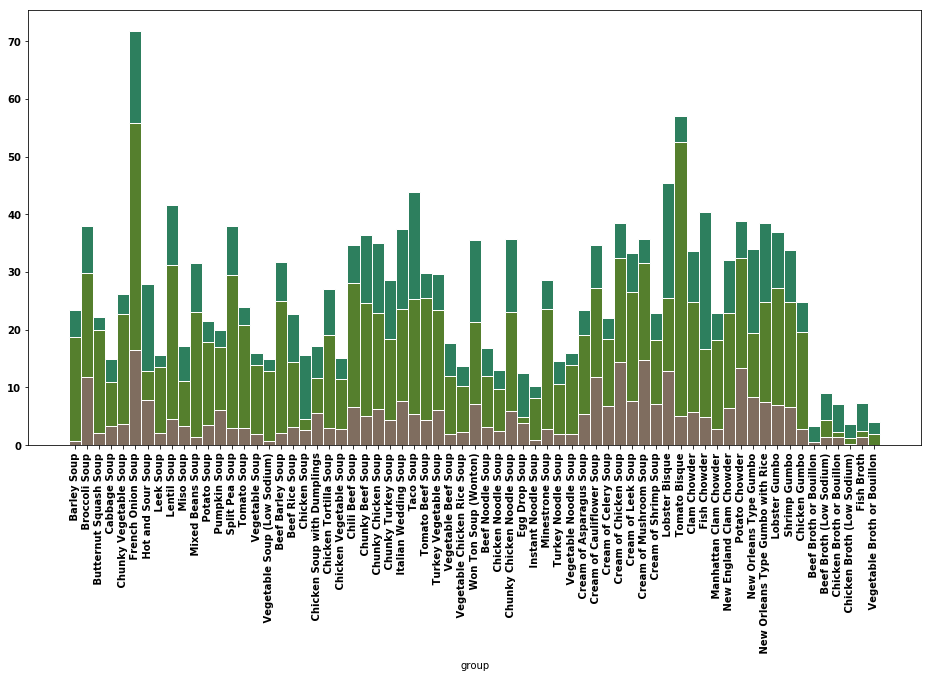

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

fig = plt.gcf()
fig.set_size_inches(16, 8)
 
# y-axis in bold
rc('font')
 
# Heights of bars1 + bars2
bars = np.add(fats, carbs).tolist()
 
# The position of the bars on the x-axis
r = []
for i in range(len(soups)):
    r.append(i)

barWidth = 1
 
# Create brown bars
f = plt.bar(r, fats, color='#7f6d5f', edgecolor='white', width=barWidth, label = 'Fats')
# Create green bars (middle), on top of the firs ones
plt.bar(r, carbs, bottom=fats, color='#557f2d', edgecolor='white', width=barWidth, label = 'Carbohydrates')
# Create green bars (top)
plt.bar(r, proteins, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth, label = 'Proteins')

# Create legend
plt.legend()


# Custom X axis
#(str(e) for e in r)
plt.xticks(r, soups, rotation = 90)
plt.xlabel("group")
 
# Show graphic
plt.show()
